In [ ]:
!pip install rdkit

In [23]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [5]:
#Load the dataset
mols=Chem.SmilesMolSupplier('confs_dataset.smi')
mols=[mol for mol in mols if mol]
print(len(mols))

10


In [ ]:
best_conf_ids=[]
n_confs=10 #10 conformers for each molecule
for mol in mols:
  mol=Chem.AddHs(mol)
  AllChem.EmbedMultipleConfs(mol,n_confs, randomSeed=19)
  best_energy = float('inf') #default value
  best_conf_id = -1 #default value

  #Whole molecule
  props=AllChem.MMFFGetMoleculeProperties(mol)
  for conf in mol.GetConformers():
    conf_id=conf.GetId()
    # MMFF (Merck Molecular Force Field) to find more stable conformation
    # Creates a force field for a specific conformer - (passing conformer ID)
    ff=AllChem.MMFFGetMoleculeForceField(mol,props, confId=conf_id)

    #Calculates the potential energy of the conformer.
    energy=ff.CalcEnergy()
    #print(energy)
    if energy<best_energy:
      best_energy=energy
      best_conf_id=conf_id
  best_conf_ids.append(best_conf_id)


In [17]:
print(f"Best Conf IDs: {best_conf_ids}")

[6, 5, 8, 6, 7, 3, 1, 4, 5, 6]


###Writing the result

In [19]:
sd_writer = Chem.SDWriter('lowest enegry.sdf')
for mol, best_conf_id in zip(mols, best_conf_ids):
  sd_writer.write(mol, confId=best_conf_id)
sd_writer.flush()

###Reading the result

SDF: Loaded: 1


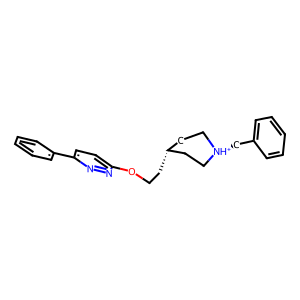

In [29]:
s_mols = [mol for mol in Chem.SDMolSupplier('lowest enegry.sdf', sanitize=False)]
s_mols = [mol for mol in s_mols if mol is not None]  # keep only valid
print(f"SDF: Loaded: {len(s_mols)}")
mol = s_mols[0]
Draw.MolToImage(mol)
